In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import randint

In [13]:
# Load data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X = data
y = target

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [17]:
# Check for missing values
# First Define the feature names
feature_names = [
    "CRIM",  # Per capita crime rate by town
    "ZN",    # Proportion of residential land zoned for lots over 25,000 sq. ft.
    "INDUS", # Proportion of non-retail business acres per town
    "CHAS",  # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    "NOX",   # Nitric oxides concentration (parts per 10 million)
    "RM",    # Average number of rooms per dwelling
    "AGE",   # Proportion of owner-occupied units built prior to 1940
    "DIS",   # Weighted distances to five Boston employment centers
    "RAD",   # Index of accessibility to radial highways
    "TAX",   # Full-value property tax rate per $10,000
    "PTRATIO", # Pupil-teacher ratio by town
    "B",     # 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
    "LSTAT"  # Percentage of lower status of the population
]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


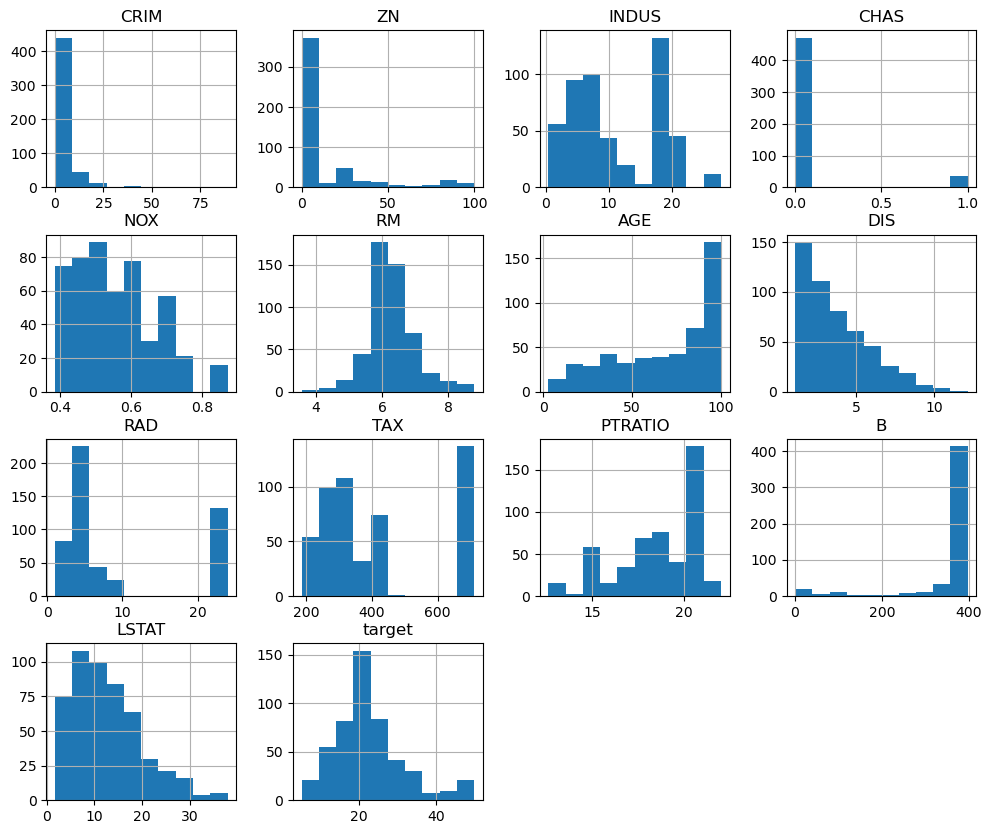

In [20]:
# Visualize the data using histograms
df.hist(figsize=(12, 10))
plt.show()

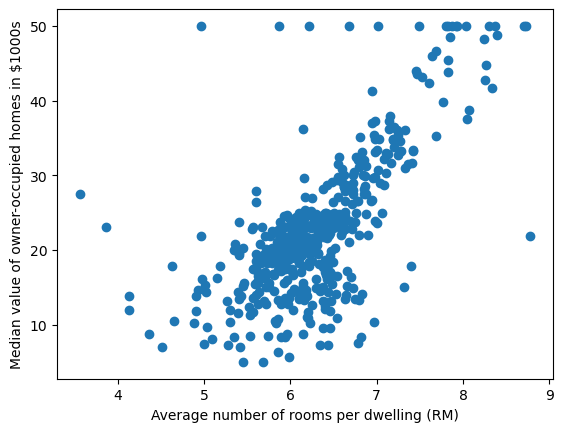

In [21]:
# Visualize the data using scatter plots
plt.scatter(df['RM'], df['target'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

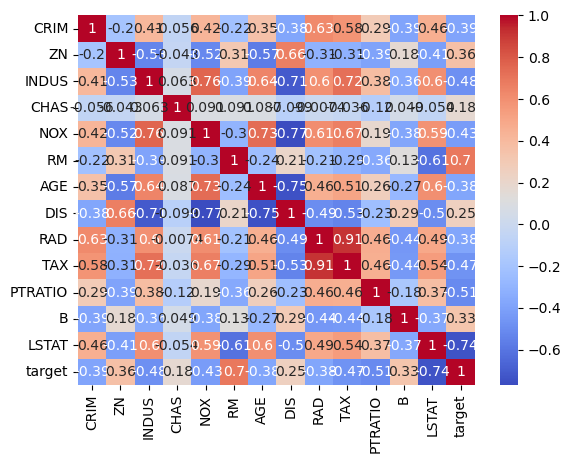

In [22]:
# Visualize the data using a correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2

# Implement Simple Linear Regression
simple_lr = LinearRegression()
simple_lr.fit(X_train[:, np.newaxis, 5], y_train) # Using the 'RM' feature (column index 5)
simple_lr_metrics = evaluate_model(simple_lr, X_test[:, np.newaxis, 5], y_test)

# Implement Multiple Linear Regression
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)
multiple_lr_metrics = evaluate_model(multiple_lr, X_test, y_test)

# Implement Polynomial Regression (use the same Linear Regression model with transformed features)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
poly_lr_metrics = evaluate_model(poly_lr, X_test_poly, y_test)

# Implement Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_metrics = evaluate_model(ridge, X_test, y_test)

# Implement Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_metrics = evaluate_model(lasso, X_test, y_test)

# Implement Support Vector Regression
svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)
svr_metrics = evaluate_model(svr, X_test, y_test)

# Implement Decision Tree Regression
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_metrics = evaluate_model(dtree,
X_test, y_test)

# Implement Random Forest Regression
rforest = RandomForestRegressor(n_estimators=100,random_state=42)
rforest.fit(X_train, y_train)
rforest_metrics = evaluate_model(rforest, X_test, y_test)

# Random Forest example
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 30),
    'min_samples_split': randint(2, 10)
}

rforest = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rforest, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", random_search.best_params_)
print("Best score for Random Forest:", -random_search.best_score_)


Best hyperparameters for Random Forest: {'max_depth': 26, 'min_samples_split': 2, 'n_estimators': 197}
Best score for Random Forest: 14.987647864525815


In [33]:
# Retrain the model with the best hyperparameters
best_rforest = random_search.best_estimator_
best_rforest.fit(X_train, y_train)
best_rforest_metrics = evaluate_model(best_rforest, X_test, y_test)

# Collect the evaluation metrics for each model in a DataFrame
model_names = ['Simple LR', 'Multiple LR', 'Polynomial LR', 'Ridge', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest', 'Tuned Random Forest']
metrics_list = [simple_lr_metrics, multiple_lr_metrics, poly_lr_metrics, ridge_metrics, lasso_metrics, svr_metrics, dtree_metrics, rforest_metrics, best_rforest_metrics]

results = pd.DataFrame(metrics_list, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=model_names)
results



,MAE,MSE,RMSE,R2
Simple LR,4.478336,46.144775,6.792995,0.370757
Multiple LR,3.189092,24.291119,4.928602,0.668759
Polynomial LR,2.587930,14.183558,3.766107,0.806589
Ridge,3.132947,24.477191,4.947443,0.666222
Lasso,3.145240,25.155594,5.015535,0.656971
SVR,3.140423,29.435702,5.425468,0.598607
Decision Tree,2.516667,11.144020,3.338266,0.848037
Random Forest,2.039539,7.901514,2.810963,0.892253
Tuned Random Forest,2.039305,8.534362,2.921363,0.883623


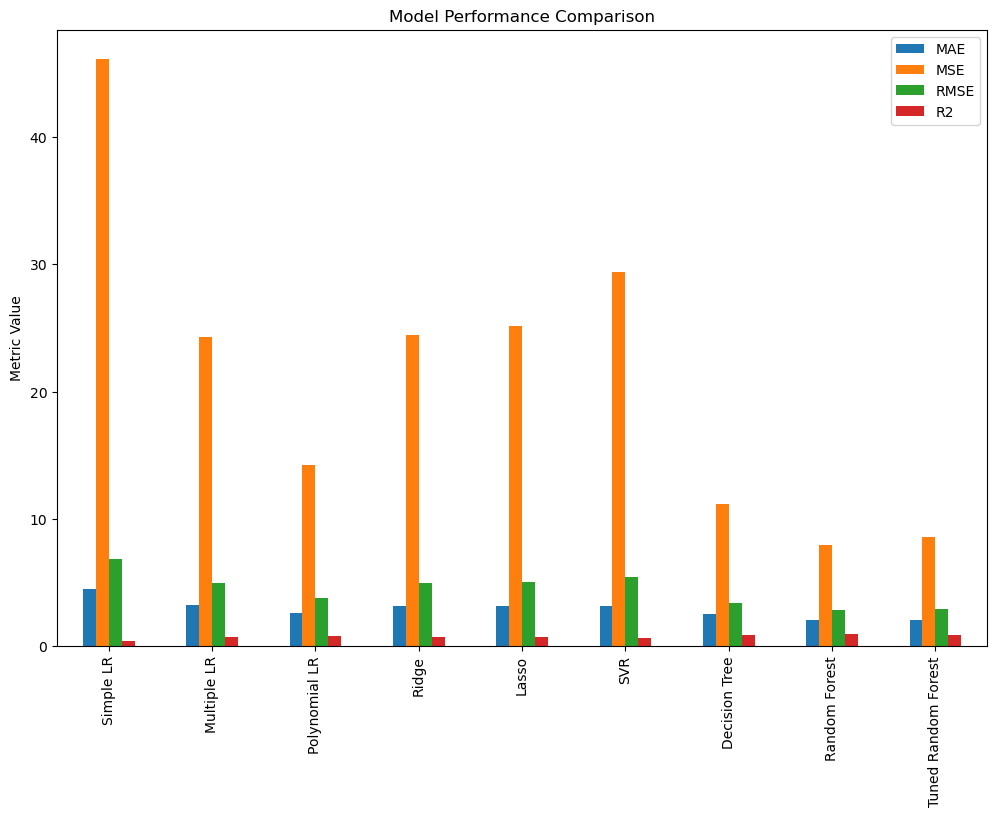

In [34]:
# Visualize the performance of each model using a bar plot
results.plot(kind='bar', figsize=(12, 8), ylabel='Metric Value', title='Model Performance Comparison')
plt.show()


In [35]:
# Select the best model (e.g., tuned random forest)
best_model = best_rforest

# Fit the best model on the entire dataset
best_model.fit(X, y)


RandomForestRegressor(max_depth=26, n_estimators=197, random_state=42)

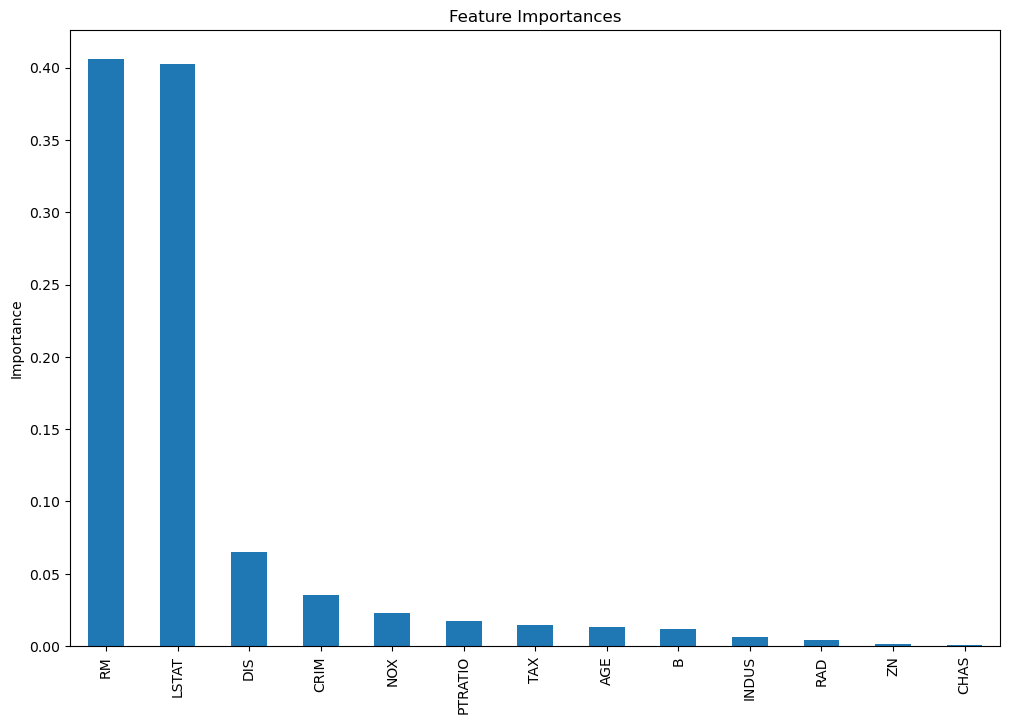

In [37]:
# Analyze feature importances for the Random Forest model
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), ylabel='Importance', title='Feature Importances')
plt.show()